In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
sc.settings.verbosity = 0
#from anndata import AnnData
import scipy
#from numpy.linalg import svd


import warnings
warnings.filterwarnings("ignore")


In [2]:
try:
    from sys import path as syspath
    from os import path as ospath
    syspath.append(ospath.join(ospath.expanduser("~"), './'))
    
    from main import *
except ImportError:
    print('Module not found')

In [3]:
ada1 = sc.read_h5ad("data/LS_processed.h5ad")
ada1

AnnData object with n_obs × n_vars = 5011 × 3000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'patient.id', 'condition', 'labels', 'ident'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    layers: 'log1p', 'raw'

In [4]:
ada2 = sc.read_h5ad("data/NL_processed.h5ad")
ada2

AnnData object with n_obs × n_vars = 2552 × 3000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'patient.id', 'condition', 'labels', 'ident'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    layers: 'log1p', 'raw'

In [5]:
ada1.obs['ident'].value_counts()

APOE+ FIB       1228
FBN1+ FIB        813
TC               765
CD40LG+ TC       630
Inflam. FIB      484
cDC2             294
Inflam. TC       266
COL11A1+ FIB     181
cDC1             121
Inflam. DC        81
NKT               81
LC                67
Name: ident, dtype: int64

In [6]:
ada2.obs['ident'].value_counts()

APOE+ FIB       1215
FBN1+ FIB        548
TC               212
COL11A1+ FIB     196
CD40LG+ TC       166
Inflam. FIB       69
Inflam. TC        44
cDC2              38
NKT               36
LC                20
cDC1               7
Inflam. DC         1
Name: ident, dtype: int64

## LS:

In [7]:
# obj1 = Xct(ada1, 'Inflam. FIB', 'Inflam. TC', build_GRN = True, save_GRN = True,
#            pcNet_name = 'net_FIB2TC_LS', mode = 'full', verbose = True)

obj1 = Xct(ada1, 'Inflam. FIB', 'Inflam. TC', build_GRN = False,
           pcNet_name = 'net_FIB2TC_LS', mode = 'full', verbose = True)
print(obj1)

init an Xct object for interactions from Inflam. FIB (484) to Inflam. TC (266)...
loading GRNs...
building correspondence...
init completed.
Xct object with the interaction between cells Inflam. FIB X Inflam. TC = 484 X 266
# of genes = 3000 X 3000 
Correspondence = 6000 X 6000


In [8]:
df1 = obj1.fill_metric()
df1

,ligand,receptor,mean_L,mean_R,var_L,var_R,disp_L,disp_R,cv_L,cv_R,cv_res_L,cv_res_R
18,IGF1,NTRK2,0.029522,0.188672,0.067410,0.382669,2.283343,2.028219,8.794479,3.278712,0.156436,-0.067928
28,AREG,NTRK2,0.003443,0.188672,0.005726,0.382669,1.663072,2.028219,21.977261,3.278712,-0.221117,-0.067928
33,FGF2,NTRK2,0.076530,0.188672,0.142827,0.382669,1.866276,2.028219,4.938230,3.278712,-0.075862,-0.067928
35,FGF7,NTRK2,0.449156,0.188672,0.835224,0.382669,1.859543,2.028219,2.034720,3.278712,0.023099,-0.067928
53,BDNF,NTRK2,0.009386,0.188672,0.016305,0.382669,1.737234,2.028219,13.604940,3.278712,-0.094830,-0.067928
...,...,...,...,...,...,...,...,...,...,...,...,...
7920,CLEC2D,KLRB1,0.065533,0.373006,0.140624,1.048742,2.145866,2.811599,5.722321,2.745485,-0.031752,0.323326
7985,RGMA,TFR2,0.053200,0.025453,0.100845,0.058621,1.895588,2.303136,5.969211,9.512453,-0.078470,-0.094694
8023,FSTL1,DIP2A,1.154967,0.179339,1.490066,0.383791,1.290138,2.140026,1.056898,3.454394,0.014484,-0.052676
8042,ACP6,HEXIM1,0.004821,0.302306,0.011224,0.625795,2.328389,2.070071,21.977261,2.616791,-0.045050,-0.016899


## mode 'full':

In [9]:
#selected LR pairs
candidates = obj1._candidates(df1)
print(len(candidates))
candidates[:5]

291


['IGF1_NTRK2', 'AREG_NTRK2', 'FGF2_NTRK2', 'FGF7_NTRK2', 'BDNF_NTRK2']

Net(
  (linear1): Linear(in_features=484, out_features=124, bias=True)
  (linear2): Linear(in_features=124, out_features=31, bias=True)
  (linear3): Linear(in_features=31, out_features=2, bias=True)
)
Net(
  (linear1): Linear(in_features=266, out_features=92, bias=True)
  (linear2): Linear(in_features=92, out_features=23, bias=True)
  (linear3): Linear(in_features=23, out_features=2, bias=True)
)
0 11754.3203125
99 651.3824462890625
199 595.1827392578125
299 568.6207885742188
399 559.784423828125
499 556.2581176757812
599 554.3508911132812
699 553.1976318359375
799 552.4650268554688
899 551.986572265625
999 551.6386108398438
1099 551.384765625
1199 551.1883544921875
1299 551.0398559570312
1399 550.9210205078125
1499 550.82177734375
1599 550.732177734375
1699 550.65478515625
1799 550.5980224609375
1899 550.5366821289062
1999 550.493408203125
2099 550.459716796875
2199 550.4227294921875
2299 550.3880615234375
2399 550.365478515625
2499 550.3388061523438
2599 550.31494140625
2699 550.2941

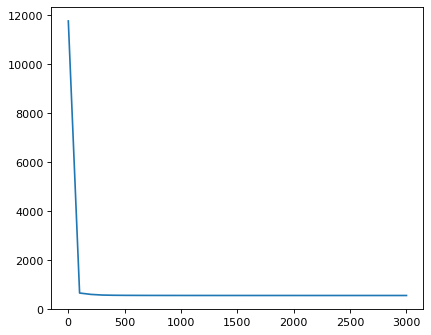

In [10]:
projections, losses = obj1.nn_projection(d = 2, n = 3000, lr = 0.001, plot_loss = True)

In [11]:
df_nn = obj1.nn_output(projections)
df_nn.head()

computing pair-wise distances...
manifold aligned # of pairs: 9000000
adding column 'rank'...
adding column 'correspondence_score'...


,idx,dist,rank,correspondence_score
RND3_MYL12A,"(1081, 12)",0.000001,1,163.257633
TNFAIP6_GNLY,"(2371, 2988)",0.000001,2,383.953677
EFEMP1_NFKBIA,"(2314, 1740)",0.000002,3,178.695709
RND3_CD69,"(1081, 2943)",0.000002,4,176.172182
CLEC3B_TNFSF10,"(2877, 1426)",0.000002,5,137.244063


In [12]:
#df_nn_to_output = df_nn.iloc[:1000, :]
#df_nn_to_output.to_csv('distances_nn.csv')

[[ 1.         -0.18000885]
 [-0.18000885  1.        ]]


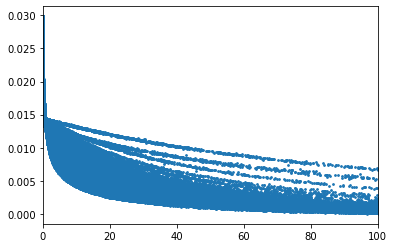

In [13]:
#check corr
select = df_nn['correspondence_score'] != 0
nX = np.asarray(df_nn['correspondence_score'][select])
nY = np.asarray(df_nn['dist'][select])
r = np.corrcoef(nX, nY)
print(r)

plt.scatter(nX, nY, s=3)
plt.xlim(0, 100)
plt.show()

In [14]:
# df_nn_filtered = df_nn.loc[candidates]
# len(df_nn_filtered)

In [15]:
df_nn_filtered = obj1.filtered_nn_output(df_nn, candidates)
df_nn_filtered.head()

manifold aligned # of L-R pairs: 291


,idx,dist,rank,correspondence_score,rank_filtered
CCL19_CXCR4,"(2993, 2548)",0.000313,6638,508.543595,1
CXCL14_CXCR4,"(2994, 2548)",0.000485,10240,223.184214,2
CCL2_TNF,"(2820, 2815)",0.000509,10768,278.113409,3
CCL2_CXCR4,"(2820, 2548)",0.000613,12988,139.847655,4
CXCL12_CXCR4,"(2919, 2548)",0.000631,13335,138.901591,5


In [16]:
df_enriched = obj1.chi2_test(df_nn, df = 3, pval = 0.05, FDR = True, candidates = candidates)

df_enriched


Total enriched: 11 / 9000000


,idx,dist,rank,correspondence_score,q_val,rank_filtered
CCL19_CXCR4,"(2993, 2548)",0.000313,6638,508.543595,0.000698,1
CXCL14_CXCR4,"(2994, 2548)",0.000485,10240,223.184214,0.001680,2
CCL2_TNF,"(2820, 2815)",0.000509,10768,278.113409,0.001854,3
CCL2_CXCR4,"(2820, 2548)",0.000613,12988,139.847655,0.002681,4
CXCL12_CXCR4,"(2919, 2548)",0.000631,13335,138.901591,0.002849,5
VCAM1_ITGB2,"(1458, 491)",0.000746,15868,72.594285,0.003948,6
CCL19_CXCR6,"(2993, 509)",0.001873,33620,289.166824,0.029506,7
CXCL14_CXCR6,"(2994, 509)",0.002036,35538,126.906465,0.035824,8
CTGF_ITGB2,"(2156, 491)",0.002089,36220,29.496370,0.037966,9
CCL2_CXCR6,"(2820, 509)",0.002173,37272,79.519834,0.041534,10


## NL:

In [17]:
# obj2 = Xct(ada2, 'Inflam. FIB', 'Inflam. TC', build_GRN = True, save_GRN = True,
#            pcNet_name = 'net_FIB2TC_NL', mode = 'full', verbose = True)

obj2 = Xct(ada2, 'Inflam. FIB', 'Inflam. TC', build_GRN = False,
           pcNet_name = 'net_FIB2TC_NL', mode = 'full', verbose = True)

print(obj2)

init an Xct object for interactions from Inflam. FIB (69) to Inflam. TC (44)...
loading GRNs...
building correspondence...
init completed.
Xct object with the interaction between cells Inflam. FIB X Inflam. TC = 69 X 44
# of genes = 3000 X 3000 
Correspondence = 6000 X 6000


In [18]:
df2 = obj2.fill_metric()
df2

,ligand,receptor,mean_L,mean_R,var_L,var_R,disp_L,disp_R,cv_L,cv_R,cv_res_L,cv_res_R
18,IGF1,NTRK2,0.130830,0.304223,0.293737,0.626534,2.245171,2.059454,4.142575,2.601836,0.028779,-0.028262
46,ANGPT1,NTRK2,0.026686,0.304223,0.048427,0.626534,1.814663,2.059454,8.246211,2.601836,-0.182010,-0.028262
379,EFNB2,PECAM1,0.030706,0.076888,0.064116,0.137466,2.088033,1.787875,8.246211,4.822135,-0.109591,-0.164362
506,HLA-B,CD3G,2.041093,0.721901,2.517178,1.537330,1.233250,2.129558,0.777310,1.717536,-0.094857,0.083886
822,HLA-DRA,CD28,0.099177,0.117833,0.219002,0.293442,2.208198,2.490323,4.718611,4.597210,-0.059555,-0.034142
...,...,...,...,...,...,...,...,...,...,...,...,...
6961,LGALS8,ITGA3,0.030576,0.071097,0.063574,0.217354,2.079197,3.057157,8.246211,6.557439,-0.109591,0.079601
6964,COL6A6,ITGA3,0.658110,0.071097,1.509870,0.217354,2.294250,3.057157,1.867115,6.557439,0.151764,0.079601
7718,HLA-B,KLRC1,2.041093,0.050747,2.517178,0.110734,1.233250,2.182102,0.777310,6.557439,-0.094857,-0.126080
7720,HLA-F,KLRC1,0.332738,0.050747,0.677309,0.110734,2.035562,2.182102,2.473381,6.557439,0.028563,-0.126080


In [19]:
#selected LR pairs
candidates2 = obj2._candidates(df2)
print(len(candidates2))
candidates2[:5]

85


['IGF1_NTRK2', 'ANGPT1_NTRK2', 'EFNB2_PECAM1', 'HLA-B_CD3G', 'HLA-DRA_CD28']

Net(
  (linear1): Linear(in_features=69, out_features=44, bias=True)
  (linear2): Linear(in_features=44, out_features=11, bias=True)
  (linear3): Linear(in_features=11, out_features=2, bias=True)
)
Net(
  (linear1): Linear(in_features=44, out_features=36, bias=True)
  (linear2): Linear(in_features=36, out_features=9, bias=True)
  (linear3): Linear(in_features=9, out_features=2, bias=True)
)
0 6034.1982421875
99 767.9232788085938
199 671.6468505859375
299 635.3758544921875
399 623.625244140625
499 619.08056640625
599 616.9776000976562
699 615.867431640625
799 615.2123413085938
899 614.7899169921875
999 614.5059204101562
1099 614.2946166992188
1199 614.1316528320312
1299 614.005859375
1399 613.9014282226562
1499 613.8232421875
1599 613.7533569335938
1699 613.6846313476562
1799 613.6729125976562
1899 613.5869140625
1999 613.5452270507812
2099 613.5118408203125
2199 613.478515625
2299 613.4498901367188
2399 613.432861328125
2499 613.423095703125
2599 613.3811645507812
2699 613.358703613281

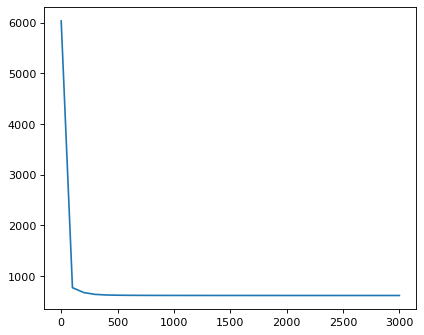

In [20]:
projections2, losses2 = obj2.nn_projection(d = 2, n = 3000, lr = 0.001, plot_loss = True)

In [21]:
df_nn2 = obj2.nn_output(projections2)
df_nn2.head()

computing pair-wise distances...
manifold aligned # of pairs: 9000000
adding column 'rank'...
adding column 'correspondence_score'...


,idx,dist,rank,correspondence_score
LTBP3_BATF,"(1210, 2421)",0.000001,1,121.369026
CCL19_SLC2A3,"(2995, 2168)",0.000002,2,347.430726
REV3L_BRD2,"(946, 506)",0.000003,3,95.308356
RNF213_RCSD1,"(1378, 2665)",0.000003,4,116.715439
HES1_C1orf162,"(2693, 760)",0.000003,5,112.985224


[[ 1.         -0.20540149]
 [-0.20540149  1.        ]]


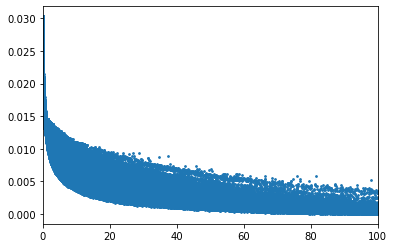

In [22]:
#check corr
select = df_nn2['correspondence_score'] != 0
nX = np.asarray(df_nn2['correspondence_score'][select])
nY = np.asarray(df_nn2['dist'][select])
r = np.corrcoef(nX, nY)
print(r)

plt.scatter(nX, nY, s=3)
plt.xlim(0, 100)
plt.show()

In [23]:
df_enriched2 = obj2.chi2_test(df_nn2, df = 3, pval = 0.05, FDR = True, candidates = candidates2)

df_enriched2


Total enriched: 11 / 9000000


,idx,dist,rank,correspondence_score,q_val,rank_filtered
CCL19_CCR6,"(2995, 1483)",0.000241,4630,283.155821,0.000462,1
CXCL14_CCR6,"(2975, 1483)",0.000266,5130,304.308339,0.000561,2
CXCL12_CCR6,"(2726, 1483)",0.000456,8887,174.530558,0.001641,3
CCL2_CXCR4,"(2635, 2613)",0.000462,8997,175.887073,0.001681,4
CCL2_CCR6,"(2635, 1483)",0.000554,10708,109.089420,0.002437,5
CXCL12_CXCR4,"(2726, 2613)",0.000567,10946,281.399141,0.002556,6
CXCL14_CXCR4,"(2975, 2613)",0.000759,14535,490.642477,0.004608,7
CCL19_CXCR4,"(2995, 2613)",0.000776,14816,456.537845,0.004829,8
HLA-B_CD3G,"(2265, 2454)",0.000890,16873,278.588229,0.006398,9
CCL2_TNF,"(2635, 2932)",0.001222,23098,519.515708,0.012110,10
